# Project Zillow

- Predict the tax assessed property value of Zillow Single Family Residential properties with transaction dates in 2017.


# Goal

- Identify drivers of property value.
- Use drivers to develop a machine learning model to predict Single Family Residential property value.

# Imports

In [1]:
# local imports
from wrangle import acquire_zillow, clean_zillow, wrangle_zillow, train_val_test, split_and_scale_data, xy_split
from explore import dist_of_data, plot_variable_pairs, plot_categorical_and_continuous_vars, evaluate_correlation, analysis_1, analysis_2, analysis_3, analysis_4, data_visual
from evaluate import plot_residuals, regression_errors, baseline_mean_errors, better_than_baseline
from model import eval_model, train_model, scale_data, wrangle_zillow_and_train_model, model_1, model_xy, model_2, model_3, final_model
from feature_engineer import select_k_features

# Acquire

- Data acquired from Codeup MySQL DB
- Data initially acquired on 7 Sep, 2023.
- It contained 52,441 rows and 49 columns before cleaning.
- Each row represents a unique parcel for each transaction it had in 2017.
- Each column represents an element of the parcel.

# Prepare

## Data Preprocessing Steps

### **Replacing Null/NaN Values:**
   - Replaced null/NaN values with appropriate strategies:
     - 0 for most columns
     - Mean or median were used as well for certain columns.

###  **Column Renaming:**
   - Renamed columns to enhance readability.

###  **Column Removal:**
   - Removed columns that did not contain useful information:
     - Columns with too many null values that couldn't be logically imputed.
     - Columns related to the target variable (tax assessed property value).

### **Row Handling:**
   - All rows were retained.
   - Filled data was calculated using existing features when necessary.

### **Data Type Validation:**
   - Checked and ensured that column data types were appropriate.

### **Outlier Handling:**
   - Kept outliers in the data, as the target value was not feature engineered.

### **FIPS Code Mapping:**
   - Mapped FIPS code to respective counties.

### **Feature Engineering:**
   - Created custom features to enrich the dataset.

### **Categorical Variable Encoding:**
   - Encoded categorical variables, including the creation of dummy variables where necessary.

### **Data Splitting:**
   - Split the data into three sets for modeling: training, validation, and test, with an approximate split of 70/15/15.

### **Data Scaling:**
   - Scaled the data using Min-Max Scaling for modeling purposes.

In [2]:
# acquire, clean, and prepare the data
df = wrangle_zillow()

# split into train, validate, and test datasets
train, val, test = train_val_test(df)

### Quick view of data,

In [3]:
# First 5 rows of data
train.head()

,parcel_id,latitude,longitude,lot_area,region_id_county,region_id_zip,property_county_landuse_code,property_zoning_desc,bathrooms,bedrooms,...,n-ac_ind,n-heat_ind,n-prop_type,state,Los Angeles County,Orange County,Ventura County,Small,Medium,Large
342,12783912,33986872.0,-118028470.0,16224,3101,96169,0100,WHR1*,2.0,4,...,1,1,Home,California,1,0,0,0,0,1
13632,14022976,33712876.0,-117885959.0,6000,1286,97004,122,LAR1,2.0,3,...,0,0,Home,California,0,1,0,0,1,0
18849,13072833,34041693.0,-117852600.0,7978,3101,96522,0100,WAC3-RPD28,2.0,3,...,1,1,Home,California,1,0,0,0,1,0
29015,12189985,33976963.0,-118285365.0,5400,3101,96025,0100,LAR2,1.0,2,...,0,0,Home,California,1,0,0,0,1,0
25542,14190405,33885799.0,-117808717.0,19267,1286,97078,122,LAR1,3.0,4,...,0,0,Home,California,0,1,0,0,0,1


### Distribution of Zillow Data

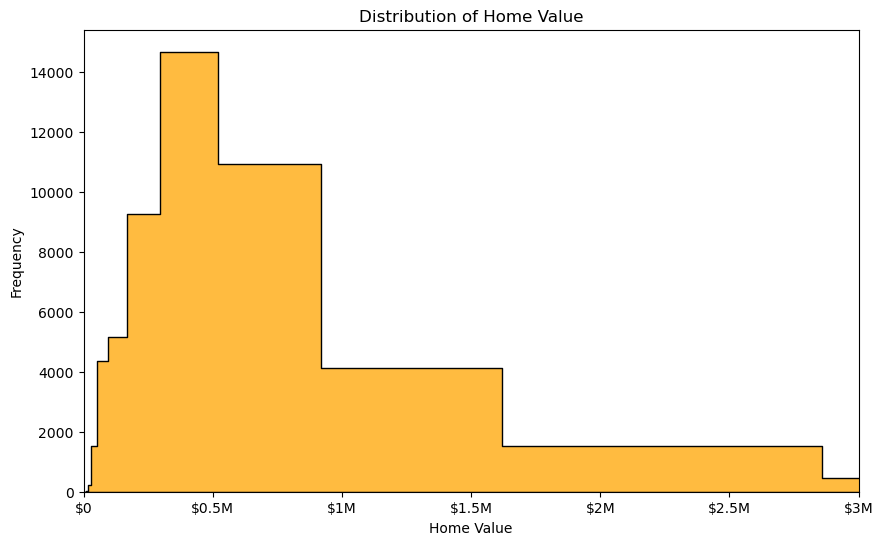

In [4]:
# function for data distribution based on target
dist_of_data(df, 'home_value')

# Explore

* Do bedrooms have a relationship with home value?
* Does home value have a correlation with year built?
* Does home value have a correlation with area?  
* Does home value have a correlation with the property lot area?  

## Question 1. - **Do bedrooms have a relationship with home_value?**

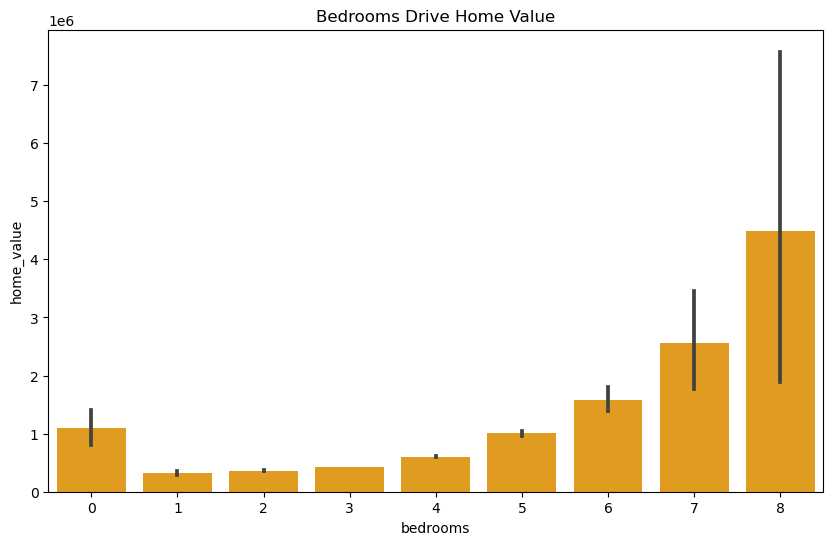

In [5]:
# analysis 1 visualization
analysis_1(train)

### **Takeaway:**  
### bedrooms clearly have a relationship that appears linear. This will be a good feature to use to predict single family residential properties in the modeling phase.

## Question 2. - **Does home value have a correlation with year built?**

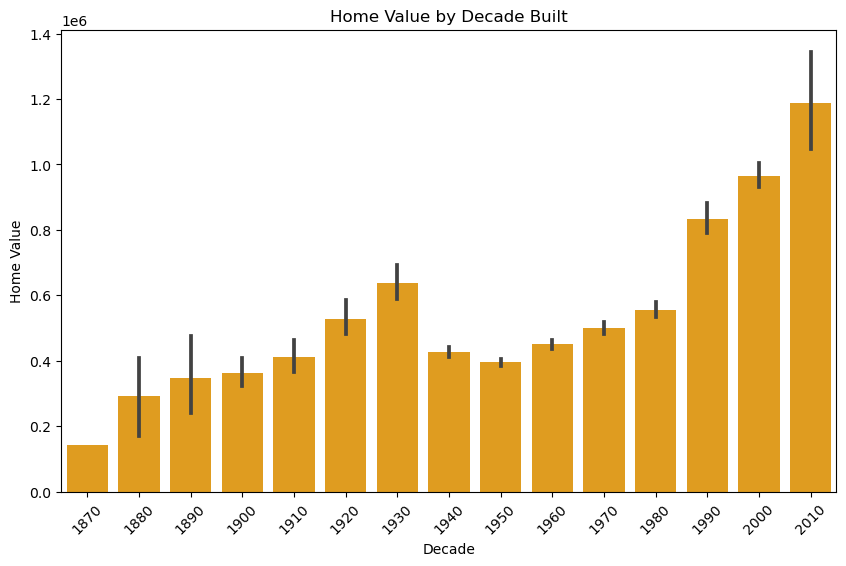

In [6]:
# analysis 2 visualization
analysis_2(train)

### **Takeaway:**  
### Home value and year built by decade show a linear relationship. This will be a good feature to use to predict single family residential properties in the modeling phase.

# Question 3. - **Does home value have a correlation with area?**  

- **Null Hypothesis($H0$):** There is **a significant correlation** between the area of the property and home value.  

- **Alternative Hypothesis($Ha$):** There **is no significant correlation** between area of the property and home value.



There is a statistically significant correlation between Area and Home Value.

p-value: 0.0




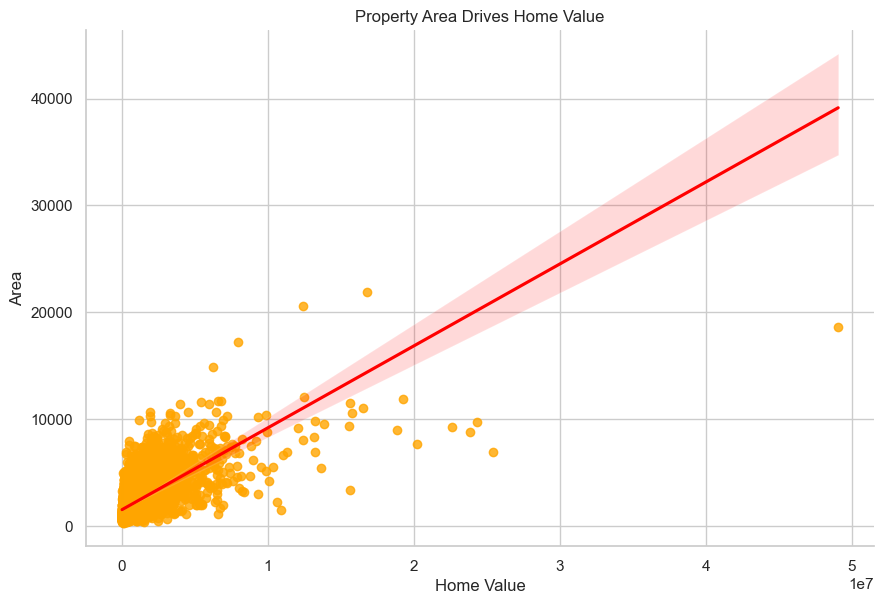

In [7]:
# Analysis 3 visualization
analysis_3(train)

### **Takeaway:** 
### The stats test Rejected the Null Hypothesis and we can draw our conclusions that there is a strong linear correlation between property area and home value

# Question 4 - **Does home_value have a correlation with the property lot area?**

- **Null Hypothesis($H0$):** There is **a significant correlation** between the lot area of the property and home value.  

- **Alternative Hypothesis($Ha$):** There **is no significant correlation** between lot area of the property and home value.



There is no statistically significant correlation between Lot Area and Home Value.

Correlation Coefficient: 0.1556

p-value: 9.429702768094296e-198




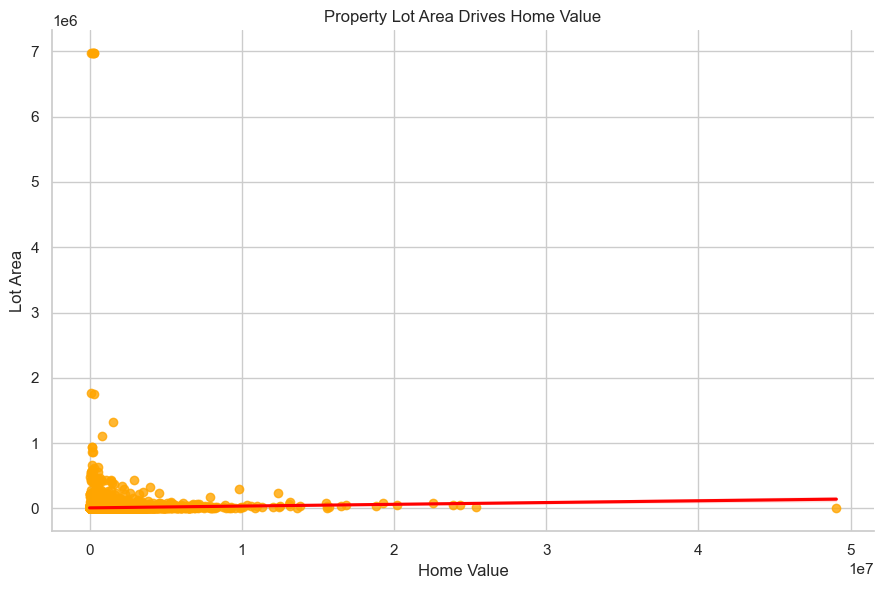

In [8]:
# analysis 4 visualization
analysis_4(train)

### **Takeaway:** 
### The stats test Failed to Rejected the Null Hypothesis and we can draw our conclusions that there is a positive correlation between lot area and home value. it may need to be feature engineered to use as a feature.

# Explore Summary

- The datset consist of alot of LA county homes,
- All counties are in the state of california.
- There is a right skew to quite a few dsitributions between categorical and continuous data.
- home value is on the lower range of the scale when they are all compared.
- larger homes exists in ventura county as well as the number of room_cnt and lot_area versus the other counties.
- most properties are listed with 0 in la county, i'm not entirely sure why, may be an issue
- the data is proportionate with home detail features versus geolocation and outside markers for single residential properties.

# Features for modeling

### **Features that will be used:**
  * *home_value*(target)  
 

### **Some features that may be useful:**  
    * *parcel_id*
    * *bathrooms*
    * *bedrooms*
    * *area*
    * *full_bath_cnt*
    * *latitude*
    * *longitude*
    * *lot_area*
    * *region_id_county*
    * *regionidzip*
    * *room_cnt*
    * *year_built*
    * *census_tract_and_block*
    * *fips*
    * *state*
    * *county*

## Modeling: Evaluation and Experimentation

### Evaluation Metric
- The primary evaluation metrics for the models are:
  - Root Mean Squared Error (RMSE)
  - Calculated Model Significance

### Data Expansion
- Given more time, additional data could be gathered to improve model performance.
- Experimentation with hyperparameter configurations can lead to better significance and lower RMSE.

### Target Feature
- The target feature for the models is `home_value`.

### Baseline RMSE
- The baseline RMSE is approximately $797,000.

### Models and Hyperparameters
- Two different sets of hyperparameters will be used for model development, each optimized for different features:
  1. RandomForestRegressor (default)
  2. XGBoostRegressor (early stopping rounds, eval set)
  3. LinearRegression (polynomial features)

### Model Evaluation
- Models will be developed and evaluated on the training and validation datasets.

### Final Model Selection
- The best-performing model, as determined by RMSE and Model Significance on the validation set, will be selected.

### Test Dataset
- The selected best model will be evaluated on the test dataset for final performance assessment.ized and easier to understand.


## Baseline Model Root Mean Squared Error

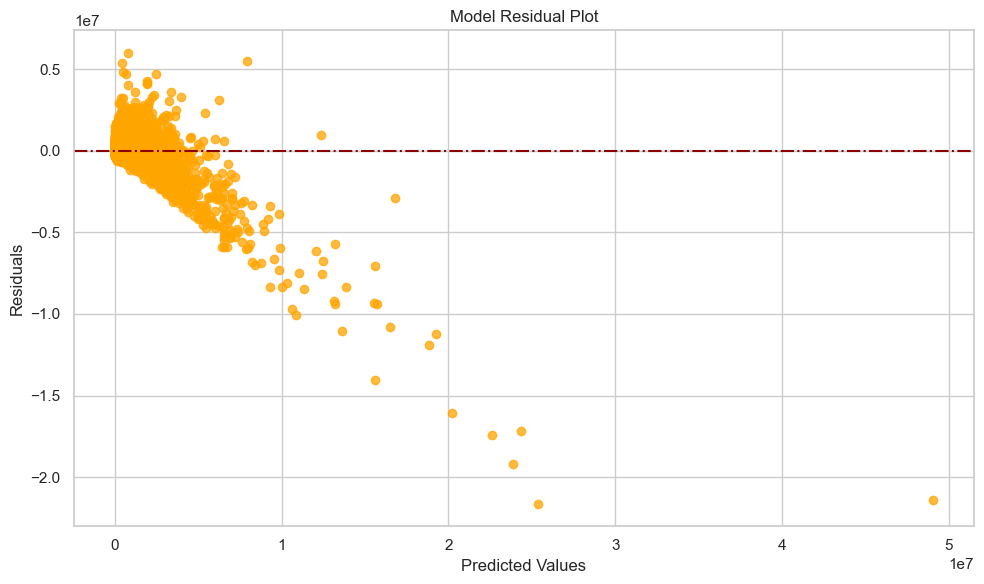


-------------------------------------

Model RMSE: 573461.85


-------------------------------------

Baseline RMSE: 796674.90


-------------------------------------


In [9]:
# baseline and model rmse and residual plot visual
wrangle_zillow_and_train_model()

## Best of 3 model configurations

###  selectkbest used for feature importance selection

In [10]:
selected_features = select_k_features(train)
selected_features.to_list()

['area',
 'finished_square_feet_12',
 'finished_sqft_15',
 'finishedsqft50',
 'n-total_rooms']

### Used in model Evaluation and they did not offer promising results.

In [11]:
X_train, y_train, X_val, y_val, X_test, y_test = model_xy()

## Model 1

In [12]:
### RandomForestRegression Model - The RandomForestRegression model showed signs of overfitting, as it performed well on the training data but had a large margin of error.
model1_results = model_1(X_train, y_train, X_val, y_val)


-------------------------------------

Training RMSE: 193168.51

-------------------------------------

Validation RMSE: 447621.06

-------------------------------------

Training R-squared (R2): 0.94

-------------------------------------

Validation R-squared (R2): 0.54


## Model 2

In [13]:
### XGBRegressor Model - hyperparameter tuning (combination of early round stopping and eval set)
model2_results = model_2(train, 'home_value', X_val, y_val, params=None)

[0]	validation_0-rmse:786378.57411
[1]	validation_0-rmse:736355.76576
[2]	validation_0-rmse:692831.99850
[3]	validation_0-rmse:656751.17766
[4]	validation_0-rmse:624698.08910
[5]	validation_0-rmse:596160.17239
[6]	validation_0-rmse:572578.66409
[7]	validation_0-rmse:551821.64488
[8]	validation_0-rmse:534563.40739
[9]	validation_0-rmse:520529.85018
[10]	validation_0-rmse:509141.09608
[11]	validation_0-rmse:498975.64707
[12]	validation_0-rmse:489600.76401
[13]	validation_0-rmse:482103.49332
[14]	validation_0-rmse:475785.13656
[15]	validation_0-rmse:470026.55689
[16]	validation_0-rmse:464991.58432
[17]	validation_0-rmse:460796.35801
[18]	validation_0-rmse:456274.67081
[19]	validation_0-rmse:453163.11796
[20]	validation_0-rmse:451613.82736
[21]	validation_0-rmse:449150.15248
[22]	validation_0-rmse:446678.51723
[23]	validation_0-rmse:444132.97637
[24]	validation_0-rmse:442993.98864
[25]	validation_0-rmse:441647.67850
[26]	validation_0-rmse:439888.78180
[27]	validation_0-rmse:438253.10623
[2

## Model 3

In [14]:
### Polynomial Features LinearRegression Model - The Polynomial Features LinearRegression model exhibited better generalization, but it had poor R2 scores.
model_3 = model_3()


-------------------------------------
The train RMSE is 560329.57.


-------------------------------------
The validation RMSE is 493614.85.



-------------------------------------

Training R-squared (R2): 0.51

-------------------------------------

Validation R-squared (R2): 0.44


## Best on Test

#### XGboost, XGBRegressor algorithm combination of early stopping rounds and eval set.

[0]	validation_0-rmse:860120.07091
[1]	validation_0-rmse:808092.98685
[2]	validation_0-rmse:762693.93915
[3]	validation_0-rmse:723009.86606
[4]	validation_0-rmse:688151.60855
[5]	validation_0-rmse:657616.34595
[6]	validation_0-rmse:631333.02689
[7]	validation_0-rmse:607954.71433
[8]	validation_0-rmse:586967.84680
[9]	validation_0-rmse:570035.50155
[10]	validation_0-rmse:554917.75189
[11]	validation_0-rmse:542087.14984
[12]	validation_0-rmse:530966.44719
[13]	validation_0-rmse:521297.18435
[14]	validation_0-rmse:512345.87383
[15]	validation_0-rmse:504808.45670
[16]	validation_0-rmse:497794.52673
[17]	validation_0-rmse:491154.22826
[18]	validation_0-rmse:485703.12258
[19]	validation_0-rmse:481803.94319
[20]	validation_0-rmse:478334.08558
[21]	validation_0-rmse:474940.97190
[22]	validation_0-rmse:471443.61915
[23]	validation_0-rmse:467839.12639
[24]	validation_0-rmse:465388.84488
[25]	validation_0-rmse:462488.23815
[26]	validation_0-rmse:459422.22513
[27]	validation_0-rmse:456854.62804
[2

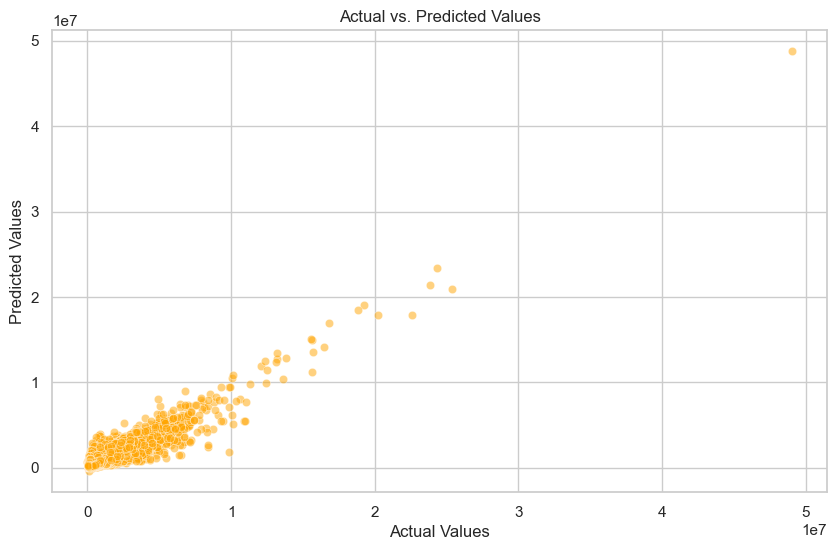




-------------------------------------

Test RMSE: 324933.15

-------------------------------------

Test R-squared (R2): 0.81

-------------------------------------

Best Iteration: 299

-------------------------------------

Best Score: 324933.1530748685


In [15]:
# final assessment on test data using XGBRegressor model
final_results = final_model(train, 'home_value', X_test, y_test, params=None)

# Model Summary

### RandomForestRegression Model
- The RandomForestRegression model showed signs of overfitting, as it performed well on the training data but had a large margin of error.
  
### Polynomial Features LinearRegression Model
- The Polynomial Features LinearRegression model exhibited better generalization, but it had poor R2 scores.

### XGBRegressor Model
- The XGBRegressor model, with hyperparameter tuning, performed the best with the following metrics:

  - RMSE: $325,000
  - R2 Score: 0.81

# Conclusion

## Takeaways and Key Findings

- Home details such as the calculated area of the home, lot area, number of bedrooms, number of bathrooms, and year built are significant drivers of home value.
- Calculated area is the most important feature across all factors.
- Higher-priced and larger single residential family properties appear to be concentrated in Ventura County, while smaller homes are spread across Orange and Los Angeles counties.
- Larger living areas correlate with higher property values.
- Location plays a crucial role in property value.


## Model Improvement
- The model still requires further improvement.

# Recommendations and Next Steps

- If the data contained detailed of hard appliances attached or amenities homebuyers seek in single family residential properties maybe this could affect property value.

- Given more time, the following actions could be considered:
  - Gather more data to improve model performance.
  - Feature engineer new variables to enhance model understanding.
      - trasnaction dates for value over time
  - Fine-tune model parameters for better performance.